# **Voorspellen van huisprijzen**

|Teamleden|Kaggle Username|GitHub Username|
|--|--|--|
|Nima Ghafar|||
|Busse Heemskerk|bussejheemskerk|BJHeemskerk|
|Henry Lau|||
|Jesse van Leeuwen|||


In [18]:
# Importing standard libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Importeren DL libaries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [3]:
# Inladen van csv bestanden
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Tonen van de data
display(train_data.head(), test_data.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


In [13]:
# Aanmaken van te vullen lijsten
file_paths_tr = []
imgdata_tr = []
file_paths_te = []
imgdata_te = []

# Opzetten directories
directories = ["train/", "test/"]

# Ophalen van de bestanden
for directory in directories:
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            file_path = os.path.join(directory, file)
                
            img = Image.open(file_path)
            img_array = np.array(img)

            # Ophalen numerieke gedeelte beastand
            file_number = ''.join(filter(str.isdigit, file))

            # Vullen van juiste lijst
            if file_number and int(file_number) > 500:
                file_paths_te.append(file_path)
                imgdata_te.append(img_array)
            else:
                file_paths_tr.append(file_path)
                imgdata_tr.append(img_array)


In [16]:
# Initieren van het dataframe
train_images = pd.DataFrame(columns=["House ID", "FilePath", "ImgData"])
test_images = pd.DataFrame(columns=["House ID", "FilePath", "ImgData"])

# Aanvullen train dataset
train_images["House ID"] = train_data["House ID"]
train_images["FilePath"] = file_paths_tr
train_images["ImgData"] = imgdata_tr

# Aanvullen test dataset
test_images["House ID"] = test_data["House ID"]
test_images["FilePath"] = file_paths_te
test_images["ImgData"] = imgdata_te

# Tonen van de dataframes
display(train_images.head(), test_images.head())

,House ID,FilePath,ImgData
0,1,train/1.jpg,"[[[156, 126, 98], [164, 137, 110], [180, 154, ..."
1,2,train/10.jpg,"[[[217, 203, 174], [210, 196, 167], [202, 188,..."
2,3,train/100.jpg,"[[[159, 147, 131], [160, 148, 132], [160, 148,..."
3,4,train/101.jpg,"[[[170, 145, 105], [166, 141, 101], [174, 149,..."
4,5,train/102.jpg,"[[[170, 105, 37], [170, 105, 37], [170, 105, 3..."


,House ID,FilePath,ImgData
0,501,test/501.jpg,"[[[255, 253, 212], [255, 253, 214], [254, 252,..."
1,502,test/502.jpg,"[[[68, 46, 9], [69, 47, 10], [70, 47, 13], [71..."
2,503,test/503.jpg,"[[[94, 125, 128], [94, 125, 128], [94, 125, 12..."
3,504,test/504.jpg,"[[[30, 21, 16], [32, 23, 18], [34, 25, 20], [3..."
4,505,test/505.jpg,"[[[124, 123, 119], [105, 104, 100], [79, 78, 7..."


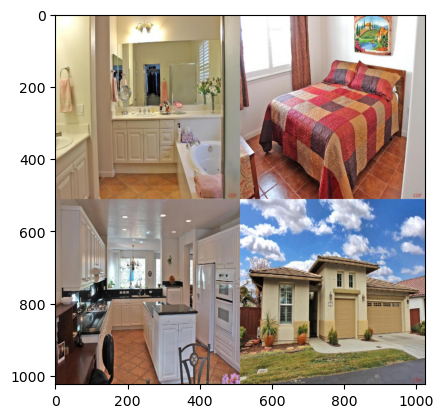

In [24]:
# Specify the path to your JPG file
image_path = test_images["FilePath"][0]

# Open the image file
img = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(img)

plt.imshow(img)

## EDA

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


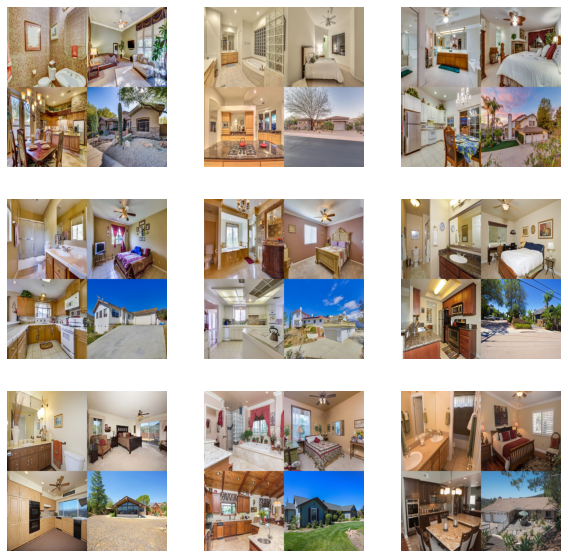

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

# Load the metadata
train_df = pd.read_csv(r'C:\Users\nimaa\Desktop\School\Deep_learning\DeepLearning_2024\Opdracht 1\train.csv')
test_df = pd.read_csv(r'C:\Users\nimaa\Desktop\School\Deep_learning\DeepLearning_2024\Opdracht 1\test.csv')

# Display the first few rows of the dataframe
display(train_df.head())
display(test_df.head())

# Read and display images
train_images_dir = r'C:\Users\nimaa\Desktop\School\Deep_learning\DeepLearning_2024\Opdracht 1\Train'
test_images_dir = r'C:\Users\nimaa\Desktop\School\Deep_learning\DeepLearning_2024\Opdracht 1\Test'

# Display some images from the train set
train_images = os.listdir(train_images_dir)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(os.path.join(train_images_dir, train_images[i]))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Display some images from the test set
if 'Price' not in train_df.columns:
    raise KeyError("Column 'target' does not exist in the dataframe.")


Train dataframe shape: (500, 7)
Train dataframe summary statistics:


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


Train dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   500 non-null    int64  
 1   Bedrooms   500 non-null    int64  
 2   Bathrooms  500 non-null    float64
 3   Area       500 non-null    int64  
 4   Latitude   500 non-null    float64
 5   Longitude  500 non-null    float64
 6   Price      500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


None

Test dataframe shape: (35, 6)
Test dataframe summary statistics:


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,518.000000,3.771429,2.600000,2297.171429,36.631043,-120.662114
std,10.246951,0.910259,0.591608,1457.127886,1.837672,1.670038
min,501.000000,2.000000,1.500000,987.000000,33.808500,-121.775800
25%,509.500000,3.000000,2.000000,1580.000000,34.724550,-121.775800
50%,518.000000,4.000000,2.500000,2012.000000,37.965800,-121.775800
75%,526.500000,4.000000,3.000000,2387.500000,37.965800,-119.311550
max,535.000000,7.000000,4.000000,9536.000000,37.965800,-117.922800


Test dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   35 non-null     int64  
 1   Bedrooms   35 non-null     int64  
 2   Bathrooms  35 non-null     float64
 3   Area       35 non-null     int64  
 4   Latitude   35 non-null     float64
 5   Longitude  35 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.8 KB


None

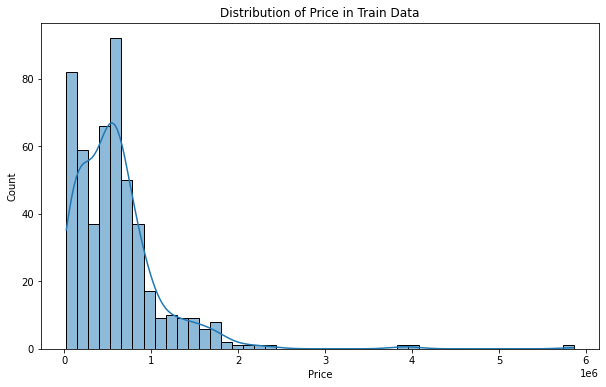

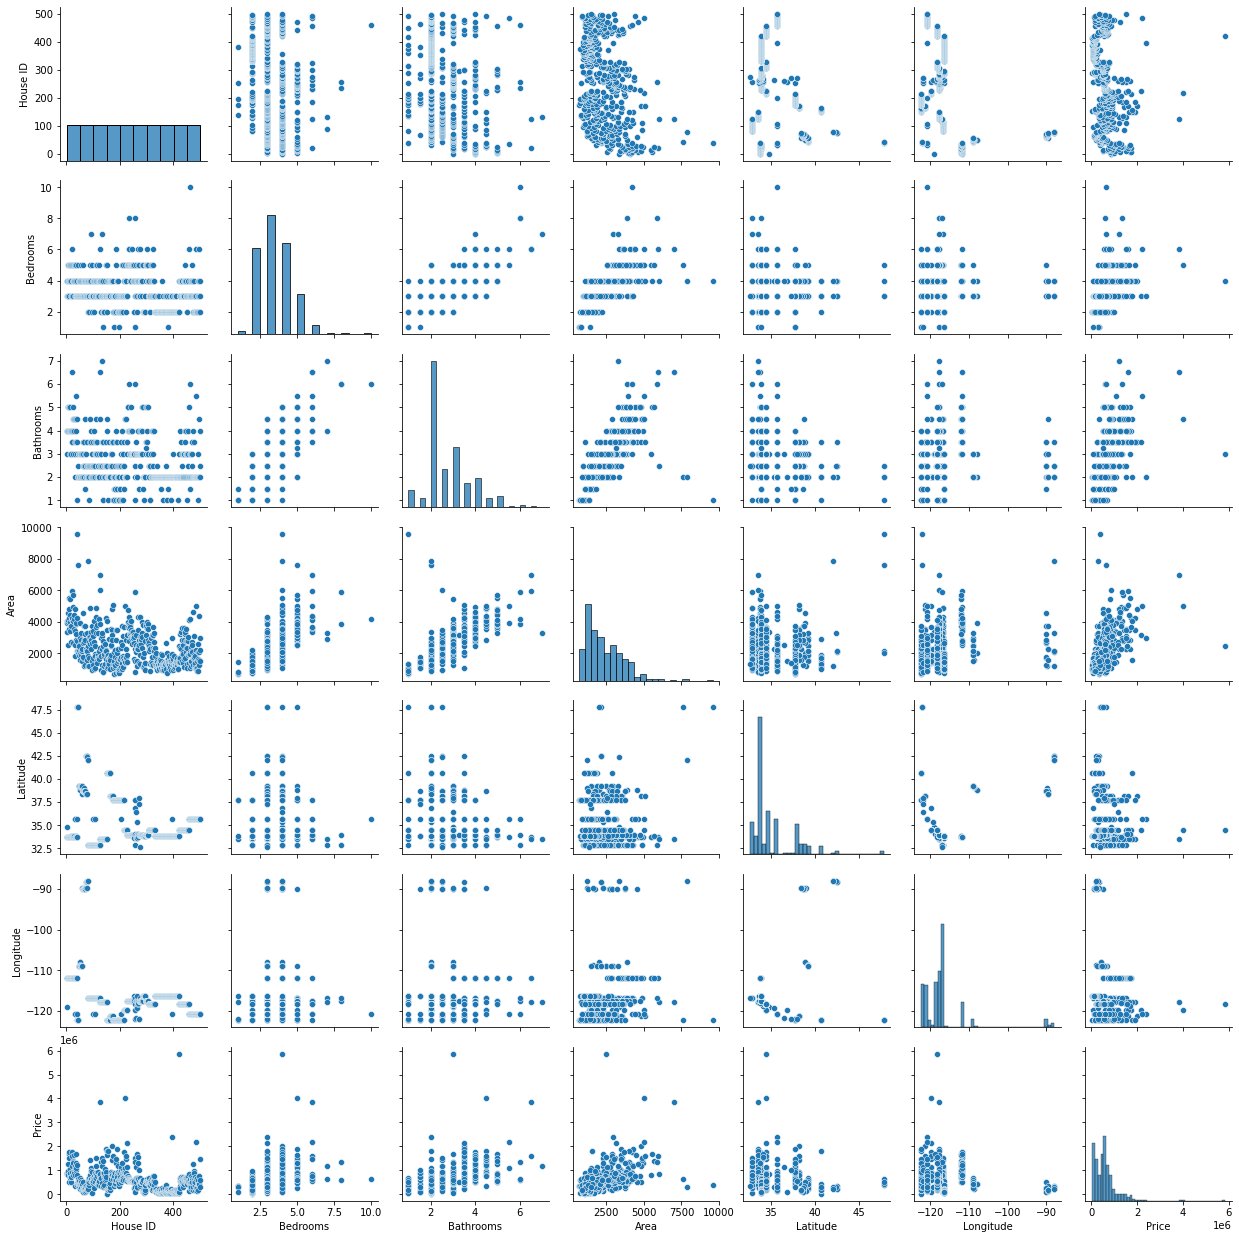

In [ ]:
# EDA on train dataframe
print("Train dataframe shape:", train_df.shape)

# Use describe() for summary statistics
print("Train dataframe summary statistics:")
display(train_df.describe(include='all'))

# Use info() for data types and missing values
print("Train dataframe info:")
display(train_df.info())

# EDA on test dataframe
print("Test dataframe shape:", test_df.shape)

# Use describe() for summary statistics
print("Test dataframe summary statistics:")
display(test_df.describe(include='all'))

# Use info() for data types and missing values
print("Test dataframe info:")
display(test_df.info())

# Visualize the distribution of the target variable in the train dataframe
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], kde=True)
plt.title('Distribution of Price in Train Data')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

sns.pairplot(train_df)
plt.show()



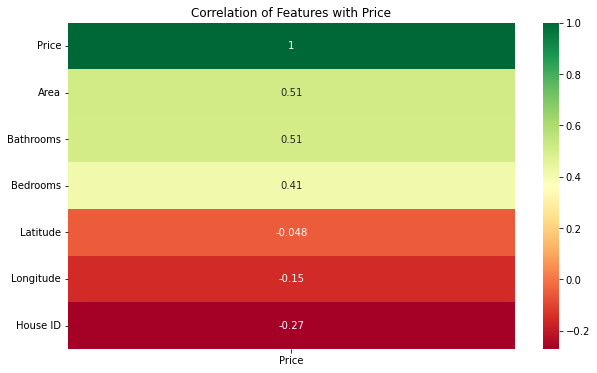

In [ ]:
# Maak een heatmap met  cmap='RdYlGn' alleen op "Price" in de train dataframe en in volgorde van hoog naar laag
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr()[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='RdYlGn')
plt.title('Correlation of Features with Price')
plt.show()



## Fully Connencted Neural Network

## CNN

# Transfer Learning

# Multimodaal model